In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta
os.getcwd()
os.chdir('D:\PhD_Material\PhD_MSc\Machine_Learning\ML_Homeworks\Homework_2\Data')


In [6]:
def histogram_plot(df,position,quintiles,upper_threshold,color):
    fig, ax = plt.subplots(figsize=(15, 10))
    # adjust the subplots region to leave some space for the sliders and buttons
    fig.subplots_adjust(top=0.90)
    name = position.upper()
    value = "{:.3e}".format(upper_threshold)
    ax.set_title(f'{name} {value} theshold')
    ax.hist(df[(df[position]<upper_threshold)][position], histtype='barstacked')
    ax.vlines(x =[df[position].quantile(quintiles)], ymin = 0, ymax = 1,transform=ax.get_xaxis_transform() ,colors = color)
    ax.vlines(x =[df[position].mean()], ymin = 0, ymax = 1,transform=ax.get_xaxis_transform() ,colors = 'r')
    # display figure
    plt.show()

In [7]:
def get_unique_values(df,column,new_column_name):
    #Creates new column with the number of unique appearances
    df[new_column_name] = pd.Series(dtype='int')
    
    for name in df[column].unique():
        df.loc[df[column] == name,new_column_name ] = df[column].value_counts()[df[column].value_counts().index.get_loc(name)]
    
    return df


In [8]:
def dif_function(df,sorting_list,new_column_name, target_column):

    
    df.sort_values(by = sorting_list,inplace=True)
    df.reset_index(drop=True, inplace=True)

    df[new_column_name] = pd.Series(dtype='int')
    df[new_column_name] = df[new_column_name].fillna(0)
    index = 0
    for name in df[sorting_list[0]].unique():
        df.loc[index,new_column_name] = 0
        index+=1
        for rep in range(len(df.loc[df[sorting_list[0]] == name])-1):
            df.loc[index, new_column_name] = df.loc[index,target_column] - df.loc[index-1,target_column]
            index+=1
    return df

In [9]:
def time_dif_function(df,sorting_list,new_column_name, target_column):

    
    df.sort_values(by = sorting_list,inplace=True)
    df.reset_index(drop=True, inplace=True)

    df[new_column_name] = pd.Series(dtype='int')
    df[new_column_name] = df[new_column_name].fillna(0)
    index = 0
    for name in df[sorting_list[0]].unique():
        df.loc[index,new_column_name] = 0
        index+=1
        for rep in range(len(df.loc[df[sorting_list[0]] == name])-1):
            df.loc[index, new_column_name] = df.loc[index,target_column] - df.loc[index-1,target_column]
            index+=1
    return df

In [10]:
print(os.listdir()[-2])
df = pd.read_csv('CAvideos.csv')

with_difs.csv


In [11]:
df['days_till_trending'] = pd.to_datetime(df['trending_date'], format = "%y.%d.%m") - pd.to_datetime(df['publish_time'][:].str[:10], format = "%Y-%m-%d")
df['publish_hour'] = pd.to_datetime(df['publish_time'][:].str[:10], format = "%Y-%m-%d")
df['number_of_tags'] = df['tags'][:].str.count('\|"').astype(int)
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = df[col].astype("string")

In [12]:
df['number_of_tags'] = df['tags'].str.count("\|")

In [14]:
df = get_unique_values(df,'title','title_number_of_trending_times')
df = get_unique_values(df,'video_id','video_id_number_of_trending_times')

<h1><center>  Create Title Difference</center></h1>

In [ ]:
lst = ['title','title_number_of_trending_times','trending_date', 'likes']
new_name = 'title_likedf'
target_column = 'likes'
df = dif_function(df, lst, new_name, target_column)

lst = ['title','title_number_of_trending_times','trending_date','likes']
new_name = 'title_dislikedf'
target_column = 'dislikes'
df = dif_function(df, lst, new_name, target_column)

lst = ['title','title_number_of_trending_times','trending_date']
new_name = 'title_tagsdif'
target_column = 'number_of_tags'
df = dif_function(df, lst, new_name, target_column)

lst = ['title','publish_hour','trending_date']
new_name = 'title_time_dif'
target_column = 'publish_hour'
df = dif_function(df, lst, new_name, target_column)

lst = ['title','views','trending_date']
new_name = 'title_views_dif'
target_column = 'views'
df = dif_function(df, lst, new_name, target_column)

lst = ['title','comment_count','trending_date']
new_name = 'title_comment_count_dif'
target_column = 'comment_count'
df = dif_function(df, lst, new_name, target_column)

KeyError: 'title_number_of_trending_times'

<center>  Create Video Id Difference</center>

In [ ]:
lst = ['video_id','video_id_number_of_trending_times','trending_date']
new_name = 'video_id_likedf'
target_column = 'likes'
df = dif_function(df, lst, new_name, target_column)

lst = ['video_id','video_id_number_of_trending_times','trending_date']
new_name = 'video_id_dislikedf'
target_column = 'dislikes'
df = dif_function(df, lst, new_name, target_column)

lst = ['video_id','video_id_number_of_trending_times','trending_date']
new_name = 'video_id_tagsdif'
target_column = 'number_of_tags'
df = dif_function(df, lst, new_name, target_column)

lst = ['video_id','publish_hour','trending_date']
new_name = 'video_id_time_dif'
target_column = 'publish_hour'
df = dif_function(df, lst, new_name, target_column)


lst = ['video_id','views','trending_date']
new_name = 'video_id_views_dif'
target_column = 'views'
df = dif_function(df, lst, new_name, target_column)

lst = ['video_id','comment_count','trending_date']
new_name = 'video_id_comment_count_dif'
target_column = 'comment_count'
df = dif_function(df, lst, new_name, target_column)

In [ ]:
for i in range(df.shape[0]):
    if type(df.loc[i,'video_id_time_dif'])==pd._libs.tslibs.timedeltas.Timedelta:
        df.loc[i,'video_id_time_dif'] =  df.loc[i,'video_id_time_dif'].total_seconds()

for i in range(df.shape[0]):
    if type(df.loc[i,'title_time_dif'])==pd._libs.tslibs.timedeltas.Timedelta:
        df.loc[i,'title_time_dif'] =  df.loc[i,'title_time_dif'].total_seconds()
for ii in range(30):
    df.loc[ii,'days_till_trending'] = df.loc[ii,'days_till_trending'].total_seconds()/86400

for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = df[col].astype("string")

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(15, 10),sharex = True)
fig.suptitle('Trending Times', fontsize=16)
ax[0].plot(df['title_number_of_trending_times'].value_counts())
ax[0].set_xlabel('Trending Times')
ax[0].set_ylabel('Song Count')
ax[0].grid(True)
ax[0].set_title('title_number_of_trending_times')

ax[1].plot(df['video_id_number_of_trending_times'].value_counts())
ax[1].set_xlabel('Trending Times')
ax[1].set_ylabel('Song Count')
ax[1].grid(True)
ax[1].set_title('video_id_number_of_trending_times')

In [ ]:
df['comments_to_views'] = df['comment_count']/df['views']
df['comments_to_views'].describe()

In [ ]:
df['likes_to_dislikes'] = (df['likes']+1)/(df['dislikes']+1)
df['likes_to_dislikes'].describe()

In [ ]:
labeling_index = df['likes_to_dislikes']*df['comments_to_views']

In [ ]:
## Classifier Function

zero_ind = df[(df['views'] < 1e5)].index
zero_ind.shape
one_ind = df[(df['views'] > 1e5) & (labeling_index < 0.05)].index
one_ind.shape
two_ind = df[(df['views'] > 1e5) & (labeling_index > 0.05) & (labeling_index < 0.25)].index
two_ind.shape
three_ind = df[(df['views'] > 1e5) & (labeling_index > 0.25)].index
three_ind.shape

In [ ]:
df['label'] = pd.DataFrame(np.zeros((df.shape[0], 1)))
df.loc[zero_ind,'label'] = 0
df.loc[one_ind,'label'] = 1
df.loc[two_ind,'label'] = 2
df.loc[three_ind,'label'] = 3

In [ ]:
df.rename({"label": "class"},inplace=True, axis =1)
df.columns
df = df.drop_duplicates('title',keep ='last')
df = df.drop_duplicates('video_id',keep ='last')
df.reset_index(drop=True, inplace= True)

In [ ]:
df_new = df[['views','likes','dislikes','comment_count','days_till_trending','number_of_tags','title_number_of_trending_times',
       'video_id_number_of_trending_times', 'title_likedf',  'title_dislikedf', 'video_id_likedf', 'video_id_dislikedf',
       'title_tagsdif', 'video_id_tagsdif', 'title_time_dif',
       'title_views_dif', 'video_id_time_dif', 'video_id_views_dif',
       'title_comment_count_dif', 'video_id_comment_count_dif',
       'comments_to_views', 'likes_to_dislikes', 'class']]
df_new.to_csv('Model_Dataset_2.csv', index=Flase)

Text(0.5, 1.0, 'days_till_trending dif vs title trending times')

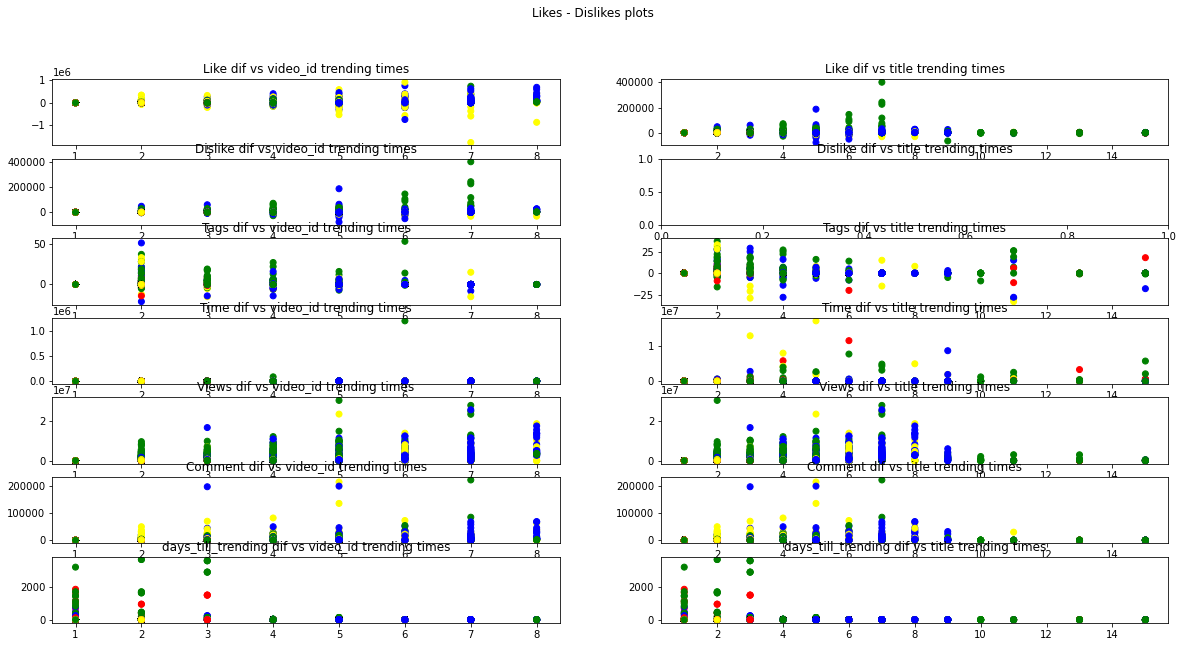

In [5]:
fig, ax = plt.subplots(7, 2, figsize = (20, 10))
fig.suptitle('Video_id and Title Dif plots')
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow'}
ax[0,0].scatter(x = df['video_id_number_of_trending_times'], y = df['video_id_likedf'],  c= df['class'].map(colors))
ax[0,0].set_title('Like dif vs video_id trending times')

ax[1,0].scatter(x = df['video_id_number_of_trending_times'], y = df['video_id_dislikedf'], c= df['class'].map(colors))
ax[1,0].set_title('Dislike dif vs video_id trending times')

ax[2,0].scatter(x = df['video_id_number_of_trending_times'], y = df['video_id_tagsdif'], c= df['class'].map(colors))
ax[2,0].set_title('Tags dif vs video_id trending times')

ax[3,0].scatter(x = df['video_id_number_of_trending_times'], y = df['video_id_time_dif'], c= df['class'].map(colors))
ax[3,0].set_title('Time dif vs video_id trending times')

ax[4,0].scatter(x = df['video_id_number_of_trending_times'], y = df['video_id_views_dif'], c= df['class'].map(colors))
ax[4,0].set_title('Views dif vs video_id trending times')

ax[5,0].scatter(x = df['video_id_number_of_trending_times'], y = df['video_id_comment_count_dif'], c= df['class'].map(colors))
ax[5,0].set_title('Comment dif vs video_id trending times')

ax[6,0].scatter(x = df['video_id_number_of_trending_times'], y = df['days_till_trending'], c= df['class'].map(colors))
ax[6,0].set_title('days_till_trending dif vs video_id trending times')

ax[0,1].scatter(x = df['title_number_of_trending_times'], y = df['title_dislikedf'], c= df['class'].map(colors))
ax[0,1].set_title('Like dif vs title trending times')

ax[1,1].scatter(x = df['title_number_of_trending_times'], y = df['title_likedf'], c= df['class'].map(colors))
ax[1,1].set_title('Dislike dif vs title trending times')

ax[2,1].scatter(x = df['title_number_of_trending_times'], y = df['title_tagsdif'], c= df['class'].map(colors))
ax[2,1].set_title('Tags dif vs title trending times')

ax[3,1].scatter(x = df['title_number_of_trending_times'], y = df['title_time_dif'], c= df['class'].map(colors))
ax[3,1].set_title('Time dif vs title trending times')

ax[4,1].scatter(x = df['title_number_of_trending_times'], y = df['title_views_dif'], c= df['class'].map(colors))
ax[4,1].set_title('Views dif vs title trending times')

ax[5,1].scatter(x = df['title_number_of_trending_times'], y = df['title_comment_count_dif'], c= df['class'].map(colors))
ax[5,1].set_title('Comment dif vs title trending times')

ax[6,1].scatter(x = df['title_number_of_trending_times'], y = df['days_till_trending'], c= df['class'].map(colors))
ax[6,1].set_title('days_till_trending dif vs title trending times')